Implementation of mini batch grandient descent in python

We will use very simple home prices data set to implement mini batch gradient descent in python.

Batch gradient descent uses all training samples in forward pass to calculate cumulitive error and than we adjust weights using derivaties

Stochastic GD: we randomly pick one training sample, perform forward pass, compute the error and immidiately adjust weights

Mini batch GD: we use a batch of m samples where 0 < m < n (where n is total number of training samples)

In [187]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt 
%matplotlib inline

In [188]:
df=pd.read_csv("homeprices_banglore.csv")
df.sample(5)

,area,bedrooms,price
8,1310,3,50.00
18,2770,3,102.00
0,1056,2,39.07
4,1200,2,51.00
9,3700,5,167.00


In [189]:
from sklearn import preprocessing 

sx=preprocessing.MinMaxScaler()
sy=preprocessing.MinMaxScaler() 

scaled_x=sx.fit_transform(df.drop("price",axis="columns"))
scaled_y=sx.fit_transform(df[['price']])

In [190]:
import random
def mini_batch_gradient_descent(X, y_true, epochs, learning_rate , batch_size):
    
    cost_list=[]
    epoch_list=[]
    total_no_of_features=X.shape[1]
    total_samples=X.shape[0]
    w=np.ones(shape=(total_no_of_features))
    bias=0
    i=0
    
    if batch_size > total_samples: # In this case mini batch becomes same as batch gradient descent
        batch_size = total_samples
    for epoch in range(epochs):
        random_indices= np.random.permutation(total_samples)
        X_tmp=X[random_indices]
        y_tmp=y_true[random_indices]
        #print(X_tmp.shape, y_tmp.shape)
        for y in range(0, total_samples, batch_size):
            X_mini_sample= X_tmp[y:y+batch_size]  
            y_mini=y_tmp[y:y+batch_size]
            y_predicted = np.dot(w, X_mini_sample.T)+ bias
            w_grad = -(2/len(X_mini_sample))*(X_mini_sample.T.dot(y_mini-y_predicted))
            b_grad = -(2/len(X_mini_sample))*np.sum(y_mini-y_predicted)
        
            w = w - learning_rate * w_grad
            bias = bias - learning_rate * b_grad
        
            cost = np.mean(np.square(y_mini-y_predicted))
            i=i+1
            if(i%10==0):
                cost_list.append(cost)
                epoch_list.append(epoch)
    return w, bias, cost,  cost_list, epoch_list
        
        

In [191]:
w, bias, cost, cost_list, epoch_list= mini_batch_gradient_descent(scaled_x, scaled_y.reshape(scaled_y.shape[0]), 120, 0.01 , 5 )
w, bias , cost 

(array([0.71001692, 0.67806684]), -0.2333716494031847, 0.004106122339497411)

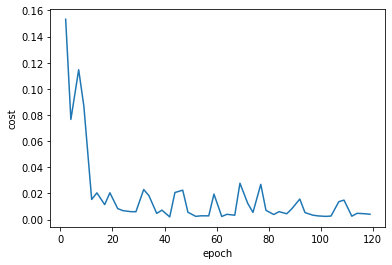

In [192]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)